#**DECISION TREE CLASSIFICATION**

#1.**Data Preparation**

In [182]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#**Load dataset**

In [183]:
data = pd.read_excel("/content/heart_disease.xlsx", sheet_name='Heart_disease', header=None)

In [184]:
print(data.head())
print(data.info())
print(data.describe())

    0     1                2         3     4      5               6       7   \
0  age   sex               cp  trestbps  chol    fbs         restecg  thalch   
1   63  Male   typical angina       145   233   True  lv hypertrophy     150   
2   41  Male  atypical angina       135   203  False          normal     132   
3   57  Male     asymptomatic       140   192  False          normal     148   
4   52  Male   typical angina       118   186  False  lv hypertrophy     190   

      8        9            10            11   12  
0  exang  oldpeak        slope          thal  num  
1  False      2.3  downsloping  fixed defect    0  
2  False        0         flat  fixed defect    0  
3  False      0.4         flat  fixed defect    0  
4  False        0         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       909 non-null    o

#2.**Exploratory Data Analysis (EDA)**

#**Missing values**

In [185]:
print(data.isnull().sum())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9     62
10     0
11     0
12     0
dtype: int64


#**Visualize feature distributions**

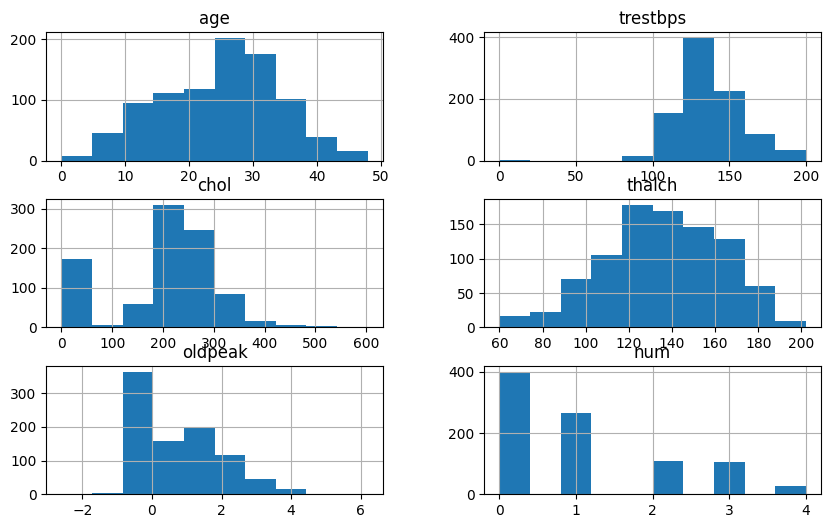

In [209]:
data.hist(figsize=(10, 6))
plt.show()

In [187]:
# Set the first row as column headers if not already done
if list(data.columns) == list(range(len(data.columns))): # Check if columns are still numerical indices
    data.columns = data.iloc[0]
    # Remove the first row from the data, as it's now the header
    data = data[1:].reset_index(drop=True)

# Convert specified columns to numeric types
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Now, proceed with diagnosing and filling NaNs in 'oldpeak'
print(f"Oldpeak dtype: {data['oldpeak'].dtype}")
print(f"Oldpeak mean: {data['oldpeak'].mean()}")
print(f"Oldpeak unique values (first 20): {data['oldpeak'].unique()[:20]}")

# Attempt to fill NaNs in 'oldpeak' specifically
oldpeak_mean = data['oldpeak'].mean()
data['oldpeak'].fillna(oldpeak_mean, inplace=True)
print(data.isnull().sum())

Oldpeak dtype: float64
Oldpeak mean: 0.8912529550827422
Oldpeak unique values (first 20): [2.3 0.  0.4 1.5 1.  nan 2.6 0.5 1.2 3.5 1.4 1.1 0.6 2.  1.6 0.1 0.3 1.3
 0.2 2.4]
0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


/tmp/ipython-input-2504834273.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['oldpeak'].fillna(oldpeak_mean, inplace=True)


**Boxplots to check outliers**

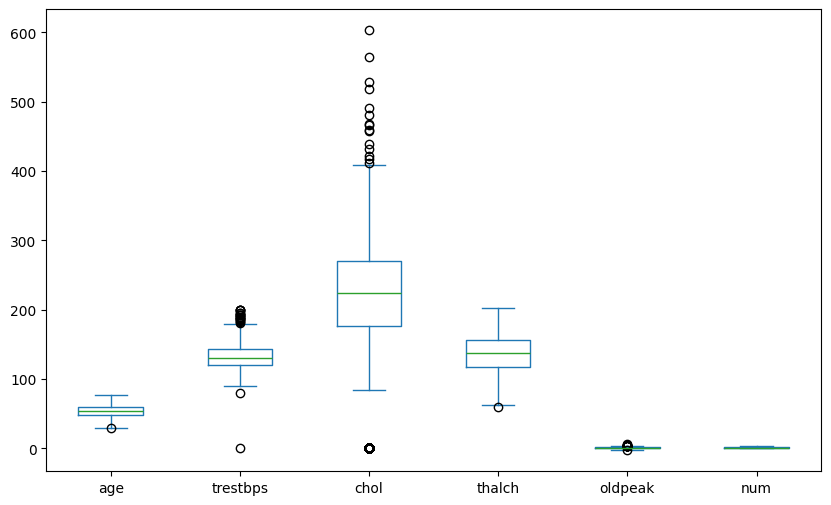

In [188]:
data.plot(kind='box', figsize=(10,6))
plt.show()


**Correlation matrix (for numerical data)**

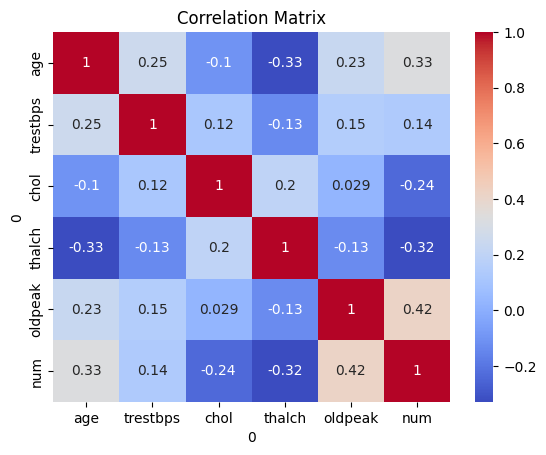

In [189]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#3.**Feature Engineering**

 **fill missing values**

In [190]:
data.fillna(data.mean(numeric_only=True), inplace=True)

**Encoding categorical variables**

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age'] = le.fit_transform(data['age'])

#4.**Decision Tree Classification**

 **Split features and target**

In [192]:
X = data.drop('num', axis=1)
y = data['num']

**rain-test split**

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
# Identify categorical columns that are still objects
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to these columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure columns are aligned between train and test sets after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("X_train info after encoding:")
print(X_train.info())
print("X_test info after encoding:")
print(X_test.info())

X_train info after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 726 entries, 84 to 102
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       726 non-null    int64  
 1   trestbps                  726 non-null    int64  
 2   chol                      726 non-null    int64  
 3   thalch                    726 non-null    int64  
 4   oldpeak                   726 non-null    float64
 5   sex_Male                  726 non-null    bool   
 6   cp_atypical angina        726 non-null    bool   
 7   cp_non-anginal            726 non-null    bool   
 8   cp_typical angina         726 non-null    bool   
 9   fbs_True                  726 non-null    bool   
 10  fbs_FALSE                 726 non-null    bool   
 11  fbs_TRUE                  726 non-null    bool   
 12  restecg_normal            726 non-null    bool   
 13  restecg_st-t abnormality  726 non-null  

**Initialize and train mode**

In [195]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**predictions**

In [196]:
y_pred = clf.predict(X_test)

**Evaluate performance**

In [197]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4945054945054945
Confusion Matrix:
 [[63 17  4  5  0]
 [17 18  4  6  3]
 [ 6  7  5  3  1]
 [ 3  7  3  4  0]
 [ 2  1  0  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        89
           1       0.36      0.38      0.37        48
           2       0.31      0.23      0.26        22
           3       0.19      0.24      0.21        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.49      0.49      0.49       182



#5. **Hyperparameter Tuning**

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [200]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy')

In [201]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [202]:
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [203]:
y_pred_best = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

Tuned Accuracy: 0.5439560439560439


#6. **Model Evaluation and Visualization**

In [204]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'exang_True <= 0.5\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]\nclass = 0'),
 Text(0.25, 0.5, 'chol <= 42.5\ngini = 0.592\nsamples = 455\nvalue = [268, 97, 44, 36, 10]\nclass = 0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.731\nsamples = 80\nvalue = [11, 29, 23, 15, 2]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.491\nsamples = 375\nvalue = [257, 68, 21, 21, 8]\nclass = 0'),
 Text(0.75, 0.5, 'age <= 33.5\ngini = 0.713\nsamples = 271\nvalue = [42, 120, 43, 54, 12]\nclass = 1'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.671\nsamples = 217\nvalue = [36, 110, 32, 32, 7]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.737\nsamples = 54\nvalue = [6, 10, 11, 22, 5]\nclass = 3')]

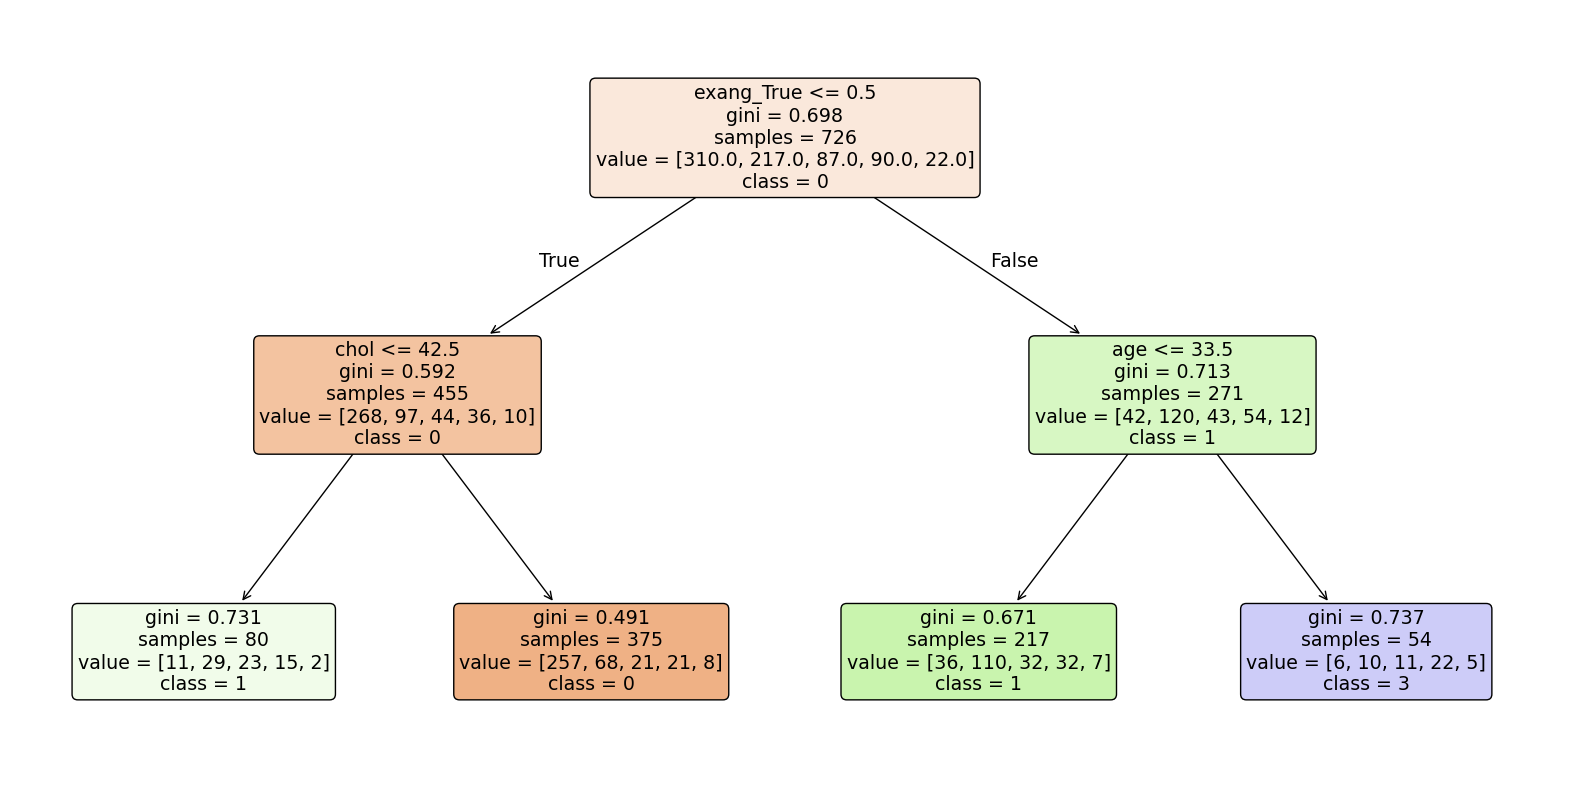

In [205]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_model,
               filled=True,
               feature_names=X_train.columns, # Changed from X.columns to X_train.columns
               class_names=[str(c) for c in np.unique(y)],
               rounded=True)

In [206]:
plt.show()

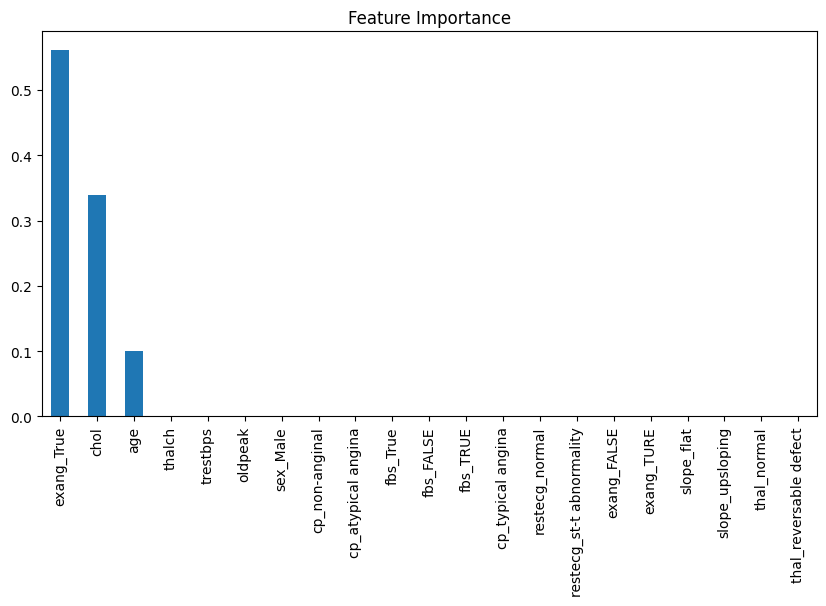

In [207]:
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()

#**Interview Questions**

1. #What are some common hyperparameters of decision tree models, and how do they affect performance?

| **Hyperparameter**  | **Description**                                     | **Effect**                                          |
| ------------------- | --------------------------------------------------- | --------------------------------------------------- |
| `criterion`         | Metric to measure split quality (`gini`, `entropy`) | Controls how purity is measured.                    |
| `max_depth`         | Maximum depth of the tree                           | Prevents overfitting (lower depth = simpler model). |
| `min_samples_split` | Minimum samples to split a node                     | Larger values prevent overfitting.                  |
| `min_samples_leaf`  | Minimum samples per leaf node                       | Ensures each leaf has enough data.                  |
| `max_features`      | Number of features considered per split             | Reduces variance and overfitting.                   |


2. What is the difference between Label Encoding and One-Hot Encoding?

| **Aspect**      | **Label Encoding**                                | **One-Hot Encoding**                                |
| --------------- | ------------------------------------------------- | --------------------------------------------------- |
| **Definition**  | Converts categories to integer labels (0,1,2,...) | Creates separate binary columns for each category   |
| **Example**     | `Red=0`, `Blue=1`, `Green=2`                      | `Red=[1,0,0]`, `Blue=[0,1,0]`, `Green=[0,0,1]`      |
| **When to Use** | When categories are **ordinal** (ordered)         | When categories are **nominal** (unordered)         |
| **Risk**        | Implies numeric order between categories          | Avoids false ordering, but increases dimensionality |
